In [261]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#making it show all columns
pd.set_option('display.max_columns', None)

- Preparing our data

In [262]:
# df = pd.read_csv("/home/thiago/data_lol/cblol/data/cblol2024_1_players.csv") # linux
df = pd.read_csv(r"C:\Users\thiag\OneDrive\Desktop\data_lol\cblol\data\cblol2024_1_players_gol.csv") # windows

In [263]:
df.head(5)

,Player,Team,Lane,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills
0,Aegis,Red Canids,Jungle,31,61.3%,3.2,2.5,3.4,8.6,5.8,340,72.1%,13.3,313,1.30,0.36,0.30,0.25,159,2,224,45.2%,6.5%,0,-
1,Aithusa,INTZ,Mid,18,16.7%,2.4,3.0,3.6,5.5,7.6,366,72.3%,29.3,653,1.19,0.49,0.25,0.24,-517,-14,-380,22.2%,5.6%,0,1
2,Ayu,FURIA,ADC,18,22.2%,3.5,3.6,2.3,4.3,9.0,409,69.8%,24.5,492,1.10,0.42,0.28,0.19,281,11,482,16.7%,0%,0,4
3,Brance,Red Canids,ADC,31,61.3%,6.1,6.1,1.9,5.7,9.2,462,76%,30.7,727,1.41,0.47,0.43,0.12,523,3,229,25.8%,9.7%,1,4
4,Cariok,paiN,Jungle,40,57.5%,3.2,1.8,3.5,9.5,5.3,318,73.7%,11.4,280,1.63,0.45,0.40,0.35,92,0,-44,55%,7.5%,0,4


In [264]:
#renaming some columns with space between
df = df.rename(columns={ 'Win rate':'Winrate',
                    'Avg kills':'AvgKills',
                    'Avg deaths':'AvgDeaths',
                    'Avg assists':'AvgAssists',
                    'Avg WPM':'AvgWPM',
                    'Avg WCPM':'AvgWCPM',
                    'Avg VWPM':'AvgVWPM',
                    'Penta Kills':'PentaKills',
                    'FB Victim':'FBVictim',
                    'Solo Kills':'SoloKills',
                    #renaming columns with @ or %
                    'KP%':'KPpercent',
                    'DMG%':'DMGpercent',
                    'GD@15':'GD15',
                    'CSD@15':'CSD15',
                    'XPD@15':'XPD15',
                    'FB %':'FBpercent',
})


In [265]:
# filtering games played to more than 6
#df = df[df.GP > 6]

- Matching each team with its color

In [266]:
team_to_color = {
    'paiN': 'red',
    'Red Canids': 'firebrick',
    'Liberty': 'skyblue',
    'LOUD': 'lime',
    'LOS' : 'orange',
    'KaBuM!' : 'darkorange',
    'Fluxo' : 'darkviolet',
    'Vivo Keyd' : 'purple',
    'FURIA' : 'black',
    'INTZ' : 'lightgray',
}
    
df['Colors'] = df['Team'].map(team_to_color)

df.head()

,Player,Team,Lane,Games,Winrate,KDA,AvgKills,AvgDeaths,AvgAssists,CSM,GPM,KPpercent,DMGpercent,DPM,VSPM,AvgWPM,AvgWCPM,AvgVWPM,GD15,CSD15,XPD15,FBpercent,FBVictim,PentaKills,SoloKills,Colors
0,Aegis,Red Canids,Jungle,31,61.3%,3.2,2.5,3.4,8.6,5.8,340,72.1%,13.3,313,1.30,0.36,0.30,0.25,159,2,224,45.2%,6.5%,0,-,firebrick
1,Aithusa,INTZ,Mid,18,16.7%,2.4,3.0,3.6,5.5,7.6,366,72.3%,29.3,653,1.19,0.49,0.25,0.24,-517,-14,-380,22.2%,5.6%,0,1,lightgray
2,Ayu,FURIA,ADC,18,22.2%,3.5,3.6,2.3,4.3,9.0,409,69.8%,24.5,492,1.10,0.42,0.28,0.19,281,11,482,16.7%,0%,0,4,black
3,Brance,Red Canids,ADC,31,61.3%,6.1,6.1,1.9,5.7,9.2,462,76%,30.7,727,1.41,0.47,0.43,0.12,523,3,229,25.8%,9.7%,1,4,firebrick
4,Cariok,paiN,Jungle,40,57.5%,3.2,1.8,3.5,9.5,5.3,318,73.7%,11.4,280,1.63,0.45,0.40,0.35,92,0,-44,55%,7.5%,0,4,red


In [267]:
# creating a dataframe per lane
df_top = df[df.Lane == 'Top']
df_jungle = df[df.Lane == 'Jungle']
df_mid = df[df.Lane == 'Mid']
df_adc = df[df.Lane == 'ADC']
df_sup = df[df.Lane == 'Support']

#testing
df_mid.head(11)

,Player,Team,Lane,Games,Winrate,KDA,AvgKills,AvgDeaths,AvgAssists,CSM,GPM,KPpercent,DMGpercent,DPM,VSPM,AvgWPM,AvgWCPM,AvgVWPM,GD15,CSD15,XPD15,FBpercent,FBVictim,PentaKills,SoloKills,Colors
1,Aithusa,INTZ,Mid,18,16.7%,2.4,3.0,3.6,5.5,7.6,366,72.3%,29.3,653,1.19,0.49,0.25,0.24,-517,-14,-380,22.2%,5.6%,0,1,lightgray
12,Envy,LOS,Mid,26,42.3%,3.8,3.8,2.7,6.3,8.7,410,71.6%,29.3,616,1.21,0.51,0.24,0.21,192,1,43,15.4%,0%,0,8,orange
13,Fuuu,Fluxo,Mid,18,38.9%,3.8,3.8,2.2,4.6,8.5,408,68.6%,28.9,608,1.09,0.46,0.18,0.23,-30,3,89,16.7%,5.6%,0,6,darkviolet
14,Grevthar,Red Canids,Mid,31,61.3%,5.1,3.0,2.2,8.3,7.8,373,70.6%,23.4,558,1.38,0.55,0.27,0.24,-184,-10,-292,22.6%,3.2%,0,1,firebrick
16,Hauz,KaBuM!,Mid,25,44%,4.2,2.9,2.3,6.6,8.6,402,75.3%,33.1,739,1.06,0.43,0.22,0.18,148,2,32,24%,12%,0,2,darkorange
22,Leleko,Vivo Keyd,Mid,28,60.7%,5.3,3.4,2.3,8.5,8.7,409,71.1%,26.4,651,1.16,0.43,0.28,0.16,-64,5,101,3.6%,3.6%,0,6,purple
29,Pilot,Liberty,Mid,18,50%,4.5,3.3,1.8,4.7,8.9,412,72.3%,27.9,562,1.21,0.42,0.25,0.20,-25,1,-124,5.6%,5.6%,0,6,skyblue
40,Tinowns,LOUD,Mid,30,70%,9.1,4.3,1.3,7.6,8.7,420,74.4%,30.0,737,1.38,0.47,0.33,0.24,151,2,251,6.7%,10%,0,6,lime
42,Toucouille,Vivo Keyd,Mid,8,62.5%,3.7,3.5,2.4,5.3,8.5,411,62.7%,30.3,688,0.91,0.39,0.14,0.13,363,11,325,25%,12.5%,0,-,purple
43,Tutsz,FURIA,Mid,18,22.2%,2.9,2.3,2.7,5.5,8.6,388,64.8%,27.1,558,1.11,0.39,0.24,0.24,-27,5,35,22.2%,0%,0,3,black


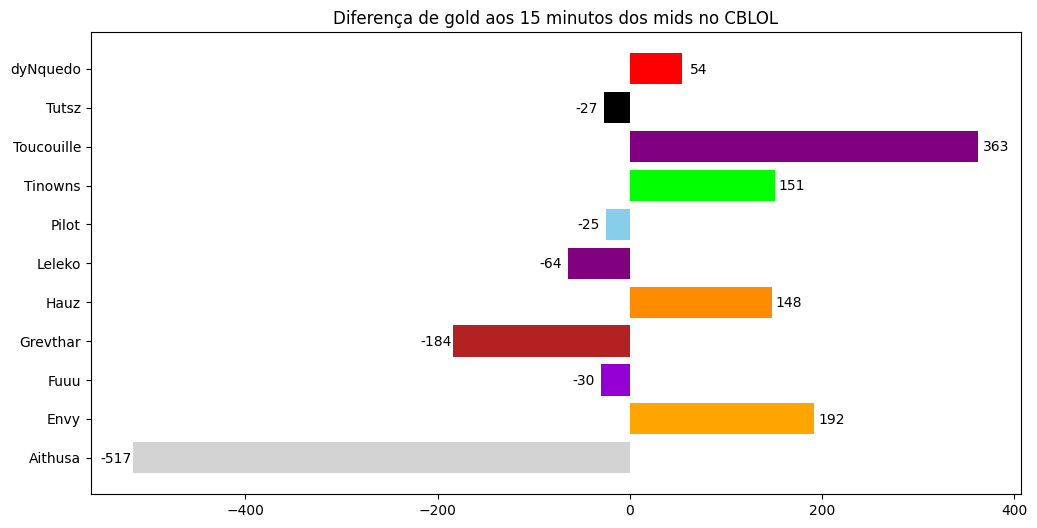

In [268]:
plt.subplots(figsize=(12, 6))
bars = plt.barh(df_mid.Player, df_mid.GD15, color=df_mid['Colors'])

for bar in bars:
    width = bar.get_width()
    if (width > 0):
        plt.text(
            width + 18,
            bar.get_y() + bar.get_height() / 4,
            f'{width}',
            ha = 'center',
            va = 'bottom',
        )
    else:
        plt.text(
        width - 18,
        bar.get_y() + bar.get_height() / 4,
        f'{width}',
        ha = 'center',
        va = 'bottom',
        )

#for bar in bars:


plt.title('Diferença de gold aos 15 minutos dos mids no CBLOL')
plt.show()